In [1]:
from collections import defaultdict
from collections import deque

from solution import DIRECTION_VECTORS
from solution import Contestant
from solution import ContestantState
from solution import Coord
from solution import Direction
from solution import Entity
from solution import EntityKind
from solution import GameState
from solution import Node


# For testing with Jupyter
def read_game_state_from_file(path: str) -> tuple[int, int, GameState]:
    # Read entities and cache by uid without refrence to root or parent
    with open(path, "r") as buffer:
        width, height = [int(i) for i in buffer.readline().strip().split()]

        tmp_entities: dict[
            int, tuple[Entity, int | None, int | None]
        ] = {}  # uid: (entity, parent_uid, root_uid)
        for idx in range(int(buffer.readline().strip())):
            (
                _x,
                _y,
                _kind,
                _owner,
                _uid,
                _dir,
                _parent_uid,
                _root_uid,
            ) = buffer.readline().strip().split()

            _tmp_uid = int(_uid) if int(_uid) else (-idx)
            tmp_entities[_tmp_uid] = (
                Entity(
                    uid=_tmp_uid,
                    x=int(_x),
                    y=int(_y),
                    kind=EntityKind(_kind),
                    owner=None if _owner == "-1" else Contestant(_owner),
                    direction=Direction(_dir),
                    root=None,
                    parent=None,
                ),
                None if int(_parent_uid) == -1 else int(_parent_uid),
                None if int(_root_uid) == -1 else int(_root_uid),
            )

        # Process entities
        entities: dict[Coord, Entity] = {}
        roots: dict[Contestant, Entity] = {}

        for entity, parent_uid, root_uid in tmp_entities.values():
            if parent_uid:
                entity = entity.update_parent(tmp_entities[parent_uid][0])
            if root_uid:
                entity = entity.update_root(tmp_entities[root_uid][0])

            entities[entity.coord] = entity
            if entity.kind == EntityKind.ROOT and entity.owner:
                roots[entity.owner] = entity

        my_a, my_b, my_c, my_d = [int(i) for i in buffer.readline().strip().split()]
        player_state = ContestantState(
            root=roots[Contestant.PLAYER],
            protein_a=my_a,
            protein_b=my_b,
            protein_c=my_c,
            protein_d=my_d,
        )

        opp_a, opp_b, opp_c, opp_d = [int(i) for i in buffer.readline().strip().split()]
        opponent_state = ContestantState(
            root=roots[Contestant.OPPONENT],
            protein_a=opp_a,
            protein_b=opp_b,
            protein_c=opp_c,
            protein_d=opp_d,
        )

        required_actions_count = int(buffer.readline().strip())

        return (
            width,
            height,
            GameState(
                player=player_state,
                opponent=opponent_state,
                entities=entities,
                actions=required_actions_count,
            ),
        )


width, height, game_state = read_game_state_from_file("./inputs/wood_3.txt")

In [2]:
entities, player, opponent = game_state.entities, game_state.player, game_state.opponent

""" Step 1: build adjacency list from map """
adjacency: defaultdict[Coord, set[Coord]] = defaultdict(set)
adj_unvisited_coords: deque[Coord] = deque([player.root.coord])
adj_visited_coords: set[Coord] = set()

# Initialize with root
adjacency[player.root.coord] = set()

while adj_unvisited_coords:
    coord = adj_unvisited_coords.popleft()

    if coord in adj_visited_coords:
        continue

    for direction, (i, j) in DIRECTION_VECTORS.items():
        nx, ny = coord[0] + i, coord[1] + j
        ncoord = (nx, ny)
        entity = entities.get(ncoord)

        if any(
            (
                nx < 0 or nx >= width,
                ny < 0 or ny >= height,
                entity and entity.kind == EntityKind.WALL,
            )
        ):
            continue

        # Only add to adjacency list if its not already there
        if ncoord not in adjacency:
            adjacency[coord].add(ncoord)
            adjacency[ncoord] = set()

        adj_unvisited_coords.append(ncoord)
    adj_visited_coords.add(coord)

for coord, neighbors in adjacency.items():
    print(coord, neighbors)


(1, 2) {(1, 3), (2, 2)}
(1, 3) {(2, 3), (1, 4)}
(2, 2) {(3, 2)}
(1, 4) {(2, 4), (1, 5)}
(2, 3) {(3, 3)}
(3, 2) {(4, 2)}
(1, 5) {(2, 5)}
(2, 4) {(3, 4)}
(3, 3) {(4, 3)}
(4, 2) {(5, 2)}
(2, 5) {(3, 5)}
(3, 4) {(4, 4)}
(4, 3) {(5, 3)}
(5, 2) {(6, 2)}
(3, 5) {(4, 5)}
(4, 4) {(5, 4)}
(5, 3) {(6, 3)}
(6, 2) {(7, 2)}
(4, 5) {(5, 5)}
(5, 4) {(6, 4)}
(6, 3) {(7, 3)}
(7, 2) {(8, 2)}
(5, 5) {(6, 5)}
(6, 4) {(7, 4)}
(7, 3) {(8, 3)}
(8, 2) {(9, 2)}
(6, 5) {(7, 5)}
(7, 4) {(8, 4)}
(8, 3) {(9, 3)}
(9, 2) {(10, 2)}
(7, 5) {(8, 5)}
(8, 4) {(9, 4)}
(9, 3) {(10, 3)}
(10, 2) {(11, 2)}
(8, 5) {(9, 5)}
(9, 4) {(10, 4)}
(10, 3) {(11, 3)}
(11, 2) {(12, 2)}
(9, 5) {(10, 5)}
(10, 4) {(11, 4)}
(11, 3) {(12, 3)}
(12, 2) {(13, 2)}
(10, 5) {(11, 5)}
(11, 4) {(12, 4)}
(12, 3) {(13, 3)}
(13, 2) {(14, 2)}
(11, 5) {(12, 5)}
(12, 4) {(13, 4)}
(13, 3) {(14, 3)}
(14, 2) {(15, 2)}
(12, 5) {(13, 5)}
(13, 4) {(14, 4)}
(14, 3) {(15, 3)}
(15, 2) {(16, 2)}
(13, 5) {(14, 5)}
(14, 4) {(15, 4)}
(15, 3) {(16, 3)}
(16, 2) set()
(14,

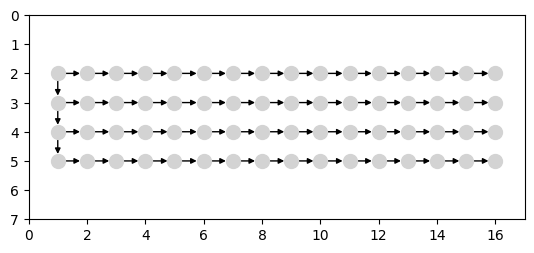

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph(adjacency)
pos = {point: point for point in adj_visited_coords}

# add axis
fig, ax = plt.subplots()
nx.draw_networkx(
    G,
    arrows=True,
    pos=pos,
    node_size=100,
    ax=ax,
    node_color="lightgray",
    width=1,
    arrowstyle="-|>",
    arrowsize=8,
    with_labels=False,
)  # draw nodes and edges
plt.axis("on")
ax.set_xlim(0, width - 1)
ax.set_ylim(height - 1, 0)
ax.set_aspect("equal")
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [4]:
""" Step 2: create nodes for graph """
nodes: dict[Coord, Node] = {}
for x, y in adjacency:
    nodes[(x, y)] = Node(x=x, y=y, entity=entities.get((x, y)))

for coord, node in nodes.items():
    x, y = coord
    adj = adjacency[coord]
    for direction, (i, j) in DIRECTION_VECTORS.items():
        nx, ny = x + i, y + j
        ncoord = (nx, ny)
        if ncoord not in adj:
            continue

        nnode = nodes[ncoord]
        node.children[direction] = nnode
        nnode.parent = node

for coord, node in nodes.items():
    print(coord, node)
    for direction, child in node.children.items():
        print(f" -> {direction.value}", direction, child.coord)


(1, 2) <solution.Node object at 0x105bb70a0>
 -> W Direction.SOUTH (1, 3)
 -> E Direction.EAST (2, 2)
(1, 3) <solution.Node object at 0x105bb7250>
 -> W Direction.SOUTH (1, 4)
 -> E Direction.EAST (2, 3)
(2, 2) <solution.Node object at 0x105bb6920>
 -> E Direction.EAST (3, 2)
(1, 4) <solution.Node object at 0x105bb7910>
 -> W Direction.SOUTH (1, 5)
 -> E Direction.EAST (2, 4)
(2, 3) <solution.Node object at 0x105bb77c0>
 -> E Direction.EAST (3, 3)
(3, 2) <solution.Node object at 0x105bb67a0>
 -> E Direction.EAST (4, 2)
(1, 5) <solution.Node object at 0x105bb7670>
 -> E Direction.EAST (2, 5)
(2, 4) <solution.Node object at 0x127285510>
 -> E Direction.EAST (3, 4)
(3, 3) <solution.Node object at 0x127285570>
 -> E Direction.EAST (4, 3)
(4, 2) <solution.Node object at 0x1272855d0>
 -> E Direction.EAST (5, 2)
(2, 5) <solution.Node object at 0x127285630>
 -> E Direction.EAST (3, 5)
(3, 4) <solution.Node object at 0x127285690>
 -> E Direction.EAST (4, 4)
(4, 3) <solution.Node object at 0x127

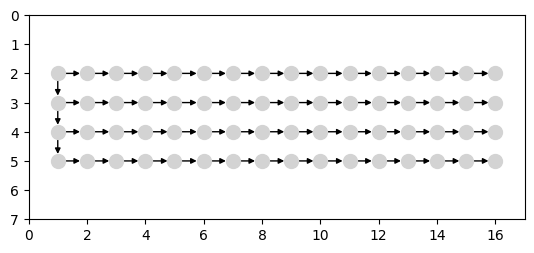

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

for node in nodes.values():
    G.add_node(node)
    for child in node.children.values():
        G.add_edge(node, child)

colormap = []
for node in G:
    if node.entity:
        colormap.append("red")
    else:
        colormap.append("blue")

pos = {node: node.coord for node in nodes.values()}


# add axis
fig, ax = plt.subplots()
nx.draw_networkx(
    G,
    arrows=True,
    pos=pos,
    node_size=100,
    ax=ax,
    node_color="lightgray",
    width=1,
    arrowstyle="-|>",
    arrowsize=8,
    with_labels=False,
    colormap=colormap,
)  # draw nodes and edges
plt.axis("on")
ax.set_xlim(0, width - 1)
ax.set_ylim(height - 1, 0)
ax.set_aspect("equal")
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()